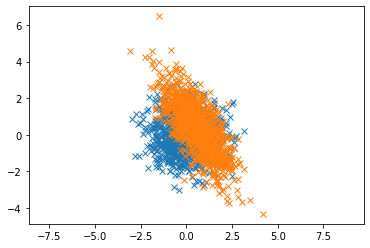

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

######## Data Generation ############
np.random.seed(0)
x,y = np.random.multivariate_normal([0,0],[[1,0],[0,1]],1000).T
data1 = np.append(x.reshape(1000,1),y.reshape(1000,1),axis=1)
labels1 = (np.ones(1000))*-1
x,y = np.random.multivariate_normal([0.5,0.5],[[1,-1],[-1,2]],1000).T
data2 = np.append(x.reshape(1000,1),y.reshape(1000,1),axis=1)
labels2 = np.ones(1000)
data = np.append(data1,data2, axis=0)
labels = np.append(labels1, labels2, axis=0)
labels = labels.reshape(2000,1)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
plt.plot(data1[:,:1],data1[:,1:],'x')
plt.plot(data2[:,:1],data2[:,1:],'x')
plt.axis('equal'); plt.show()

In [33]:
############# Converting Data from numpy to tensors

import torch
import torch.nn as nn


X = torch.tensor(X_train, dtype=torch.float) 
y = torch.tensor(y_train, dtype=torch.float) 
xPredicted = torch.tensor(X_test, dtype=torch.float)

In [180]:
class Neural_Network(nn.Module):
        def __init__(self, epochs):
            super(Neural_Network, self).__init__()
            # parameters
            self.epochs = epochs
            self.all_layers_sizes = [2,3,5,3,1]
            self.eta = 0.01

            # Initialize random weights & bias
            self.w = []
            for _layer in range(len(self.all_layers_sizes)-1):
                self.w.append(torch.randn(self.all_layers_sizes[_layer], self.all_layers_sizes[_layer+1]))

            self.b = []
            for _ in range(len(self.all_layers_sizes)-1):
                self.b.append(torch.randn(1))
        
        def forward(self, X):
            ip = X
            h = []
            h.append(torch.tensor(ip))
            for _layer in range(len(self.all_layers_sizes)-1):
                op = torch.matmul(ip,self.w[_layer].float()) + self.b[_layer] # 3 X 3 ".dot" does not broadcast in PyTorch
                op = nn.functional.sigmoid(op) # activation function
                
                if len(op.shape)==0:
                    op = [[op]]
                h.append(op)
                ip = op
            
            return h
        
        def update_del_J(self,w,h):
            s = nn.functional.sigmoid(torch.matmul(h.float(),w))
            del_s = s*(1-s)
            del_final = torch.matmul(h.T.float(),del_s.float())
            return 2*del_final
        
        def backward(self,X,y,h):            
            del_error = 2*(h[len(self.all_layers_sizes)-1]-y)
            del_J = torch.tensor([[torch.sum(del_error)]])
#             for i in range(4):
#                 print("h : ",h[i+1].shape)
#                 print("w : ",self.w[i].shape)
            for _layer in range(len(self.all_layers_sizes)-2,-1,-1):
                del_J = torch.matmul(self.update_del_J(self.w[_layer], h[_layer]).float(), del_J.float())
                self.w[_layer] -= eta*del_J
                
        def train(self,X,y):
            for _epoch in range(self.epochs):
                op = self.forward(X.float())
                self.backward(X,y,op)
        
    

In [181]:
# MSE Backprop

model = Neural_Network(epochs=1000)
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
model.train(X_train,y_train)
print(model.w)



/home/swish-coder/.virtualenvs/SMAI/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/home/swish-coder/.virtualenvs/SMAI/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/home/swish-coder/.virtualenvs/SMAI/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[tensor([[-5.5792e+12, -5.5792e+12, -5.5792e+12],
        [-4.4794e+12, -4.4794e+12, -4.4794e+12]]), tensor([[-1.0145e+10, -1.0145e+10, -1.0145e+10, -1.0145e+10, -1.0145e+10],
        [-1.0391e+10, -1.0391e+10, -1.0391e+10, -1.0391e+10, -1.0391e+10],
        [-8.6348e+09, -8.6348e+09, -8.6348e+09, -8.6348e+09, -8.6348e+09]]), tensor([[ -8386097.0000,  -8386097.5000,  -8386097.0000],
        [ -9138909.0000,  -9138908.0000,  -9138909.0000],
        [ -8441691.0000,  -8441690.0000,  -8441690.0000],
        [-10072779.0000, -10072783.0000, -10072780.0000],
        [ -6895982.5000,  -6895978.0000,  -6895978.5000]]), tensor([[ -7795.4634],
        [-10821.4980],
        [-15563.0010]])]


/home/swish-coder/.virtualenvs/SMAI/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/swish-coder/.virtualenvs/SMAI/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Accuracy of model with bias:  0.4975


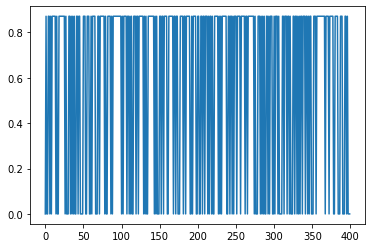

In [182]:
from sklearn.metrics import accuracy_score

X_test = torch.tensor(X_test)
output = model.forward(X_test.float())
y_pred = []

output = output[4]
for i in range(len(output)):
    if(output[i]>0.9):
        y_pred.append(1)
    else:
        y_pred.append(-1)

sample_index = [i for i in range(len(X_test))]
acc = accuracy_score(y_test, y_pred)
print("Accuracy of model with bias: ", acc)
# print(output)
plt.plot(sample_index, output)
plt.show()
